# Heart Attack Change Prediction with Naive Bayes


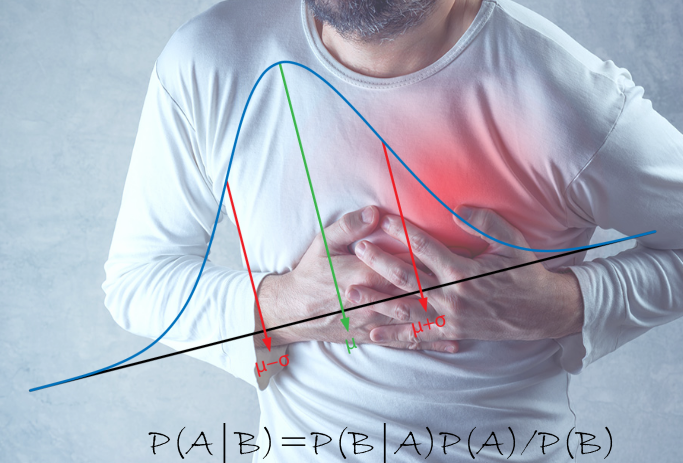

Data Base

A used database is available on Kaggle: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

information

Predictor variables:

age: patient age

sex: patient's sex

exang: exercise-induced angina (1 = yes; 0 = no)

ca: number of large vessels (0-3)

cp: type of chest pain (angina)

Value 1: typical angina
Value 2: atypical angina
Score 3: non-anginal pain
Value 4: asymptomatic
trtbps: resting blood pressure (in mm Hg)

chol: cholesterol in mg/dl obtained through the BMI sensor
fbs: (fasting blood sugar >120 mg/dl) (1=true; 0=false)
rest_ecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression >0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy 
thalach: maximum heart rate reached
Predicted variable:

0 = less chance of heart attack
1 = more likely to have a heart attack

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('heart.csv') ; df


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Descriptive statistics


#### In this step, I will build a descriptive analysis on the data, before performing the pre-processing

#### Numeric variables
- Average
- median
- variance
- Standard deviation
- Quartiles

#### Data Presentation


In [3]:
print(f' Values Count Table of all DF columns:\n{df.notnull().sum()}')
print('--'*40)
print(f'Number of DF Row/columns\n{df.shape}')

 Values Count Table of all DF columns:
age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64
--------------------------------------------------------------------------------
Number of DF Row/columns
(303, 14)


In [4]:
print(f'Specifying the data type of each DataFrame column\n{df.dtypes}')

Specifying the data type of each DataFrame column
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


In [5]:
print('\033[1m' + 'Data Description:' + '\033[0m')
display(df.describe().round(2))

Data Description:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [6]:
#output variable
#Classes from the dataset examples
y = df['output']
del df['output']
#Input variables (predictors)
Vars = list(df.columns)   #Name of predictor variables
x    = np.array(df)       #Predictor variables: Vegetation indices

# Separate data in training, testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [7]:
print(Vars)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


In [8]:
# Shows the number of examples
print('Quantidade de instâncias: %.d' %len(x))
print('Treinamento: %.d' %x_train.shape[0])
print('Teste: %.d' %x_test.shape[0])

Quantidade de instâncias: 303
Treinamento: 212
Teste: 91


In [9]:
#Separate the groups in relation to the chance of heart attack
# And shows some statistics of these groups
ataque_pos = []
ataque_neg = []

for i, ys in enumerate(y):
  if ys == 0:
    ataque_neg.append(x[i,:])
  else:
    ataque_pos.append(x[i,:])

#Create two dataframes to compute some statistics
df_pos = pd.DataFrame(data=ataque_pos, columns=Vars)
df_neg = pd.DataFrame(data=ataque_neg, columns=Vars)

print('Patients most likely to have a heart attack')
display(df_pos.describe().round(2))

print()

print('Patients least likely to have a heart attack')
display(df_neg.describe().round(2))

Patients most likely to have a heart attack


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00
mean,52.50,0.56,1.38,129.30,242.23,0.14,0.59,158.47,0.14,0.58,1.59,0.36,2.12
std,9.55,0.50,0.95,16.17,53.55,0.35,0.50,19.17,0.35,0.78,0.59,0.85,0.47
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,96.00,0.00,0.00,0.00,0.00,0.00
25%,44.00,0.00,1.00,120.00,208.00,0.00,0.00,149.00,0.00,0.00,1.00,0.00,2.00
50%,52.00,1.00,2.00,130.00,234.00,0.00,1.00,161.00,0.00,0.20,2.00,0.00,2.00
75%,59.00,1.00,2.00,140.00,267.00,0.00,1.00,172.00,0.00,1.00,2.00,0.00,2.00
max,76.00,1.00,3.00,180.00,564.00,1.00,2.00,202.00,1.00,4.20,2.00,4.00,3.00



Patients least likely to have a heart attack


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,138.00,138.00,138.00,138.00,138.00,138.00,138.00,138.0,138.00,138.00,138.00,138.00,138.00
mean,56.60,0.83,0.48,134.40,251.09,0.16,0.45,139.1,0.55,1.59,1.17,1.17,2.54
std,7.96,0.38,0.91,18.73,49.45,0.37,0.54,22.6,0.50,1.30,0.56,1.04,0.68
min,35.00,0.00,0.00,100.00,131.00,0.00,0.00,71.0,0.00,0.00,0.00,0.00,0.00
25%,52.00,1.00,0.00,120.00,217.25,0.00,0.00,125.0,0.00,0.60,1.00,0.00,2.00
50%,58.00,1.00,0.00,130.00,249.00,0.00,0.00,142.0,1.00,1.40,1.00,1.00,3.00
75%,62.00,1.00,0.00,144.75,283.00,0.00,1.00,156.0,1.00,2.50,1.75,2.00,3.00
max,77.00,1.00,3.00,200.00,409.00,1.00,2.00,195.0,1.00,6.20,2.00,4.00,3.00


In [10]:
 # Naive Bayes Gaussian
clf = GaussianNB()
clf.fit(x_train, y_train)

#predictions
y_pred = clf.predict(x_test)

#Calculates accuracy and precision
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)

print('accuracy: %.4f' %acc)
print('precision: %.4f' %pre)

accuracy: 0.8022
precision: 0.7736


C:\Users\joao_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


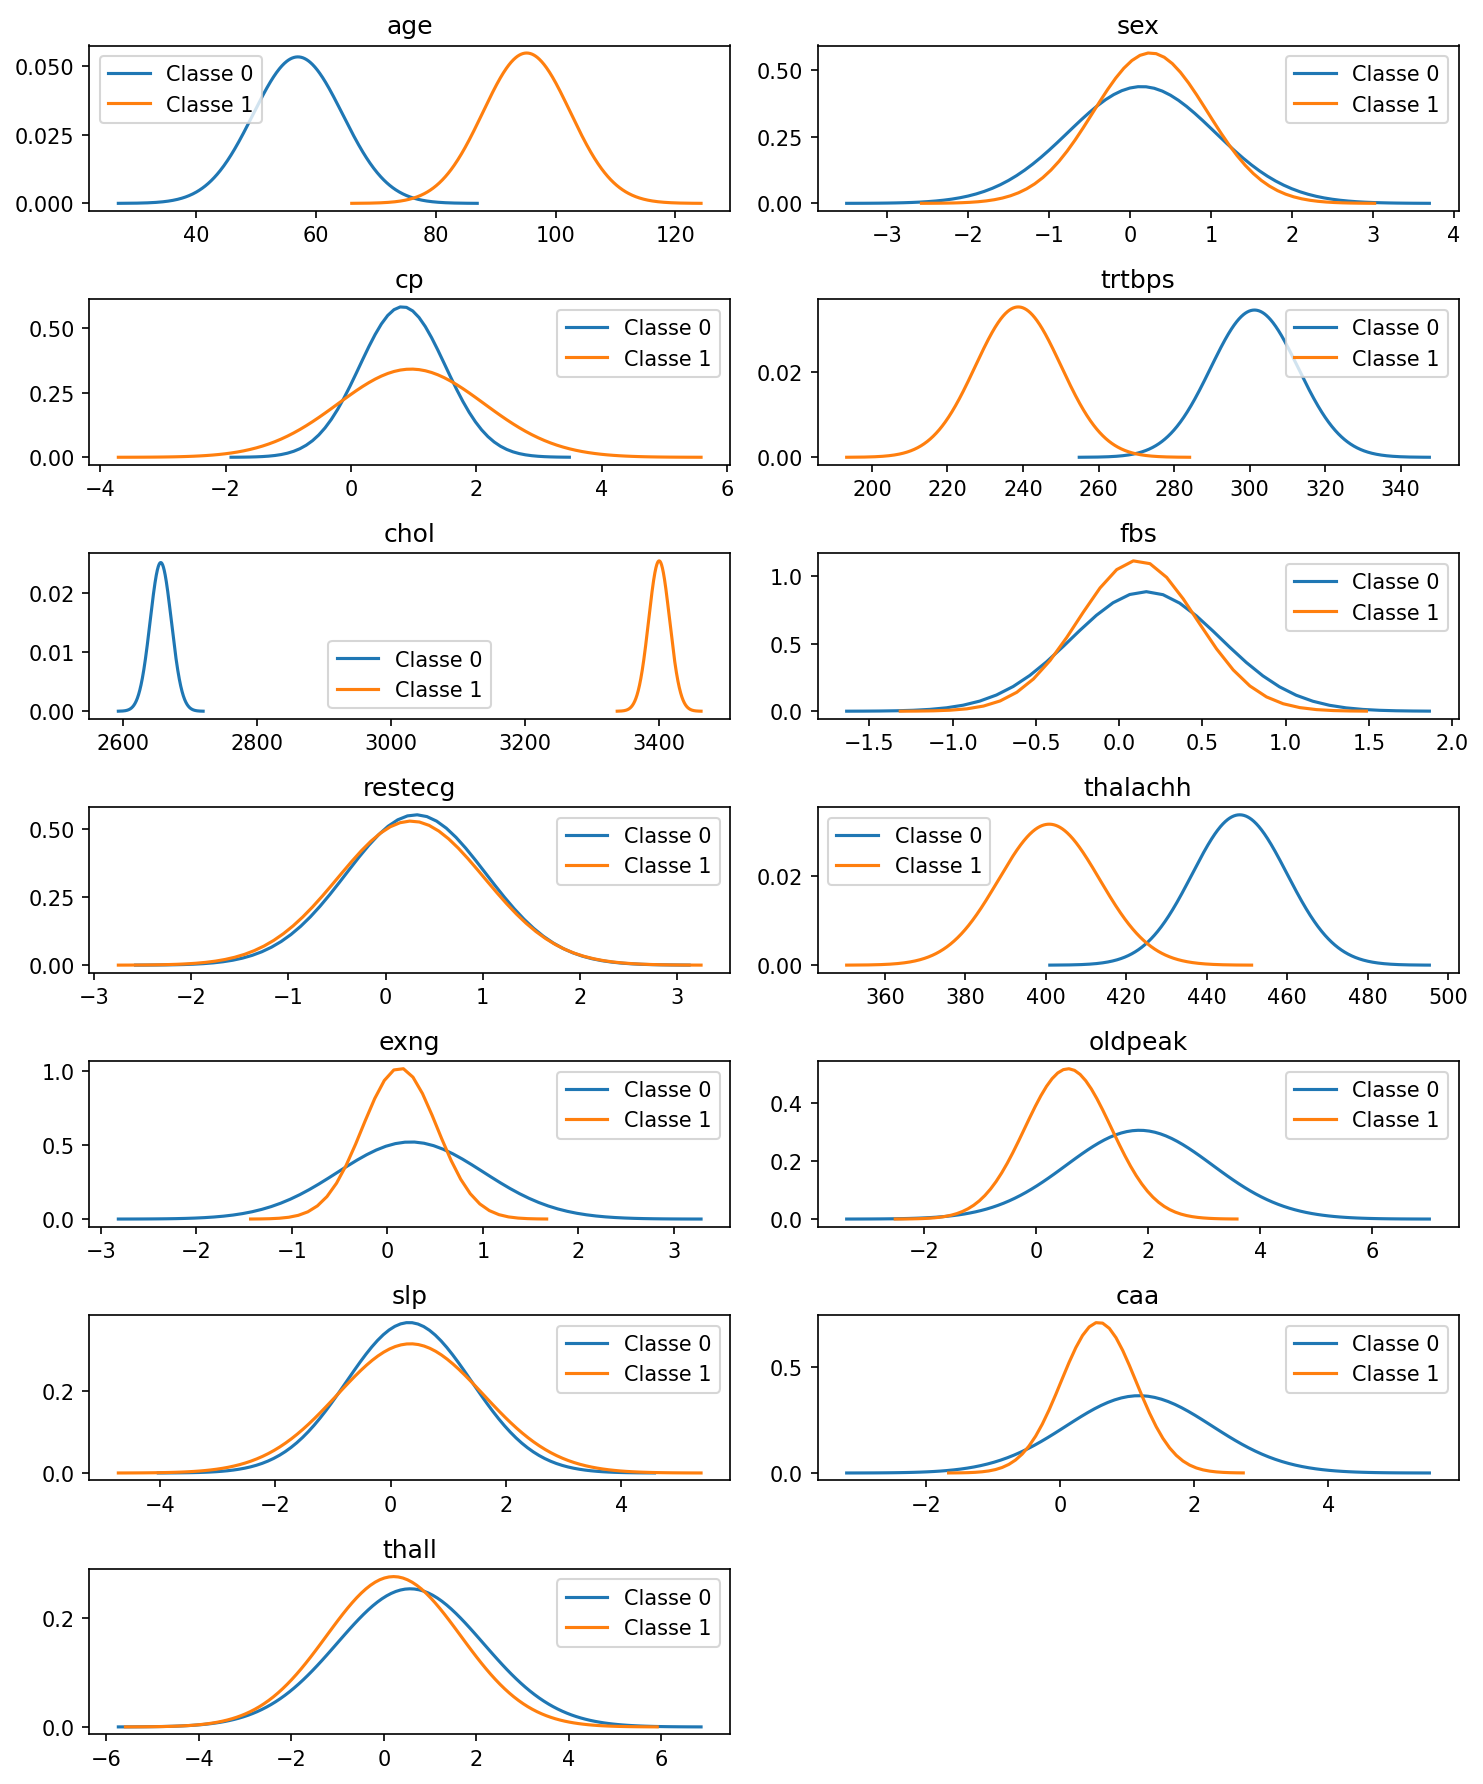

In [11]:
import scipy.stats as stats

#Gaussian Probability Density Function
def gaussian(mu, sigma):
  sigma2 = np.sqrt(sigma)
  x      = np.arange(mu - 4*sigma2, mu + 4*sigma2, 0.1)
  pdf    = stats.norm.pdf(x, mu, sigma2)
  return x, pdf


plt.figure(dpi=150, figsize=(10, 12))

sigma = clf.sigma_ #variance
mu    = clf.theta_ #average
for i, v in enumerate(Vars):
  x0, pdf0 = gaussian(sigma[0][i], mu[0][i])
  x1, pdf1 = gaussian(sigma[1][i], mu[1][i])

  plt.subplot(7, 2, i + 1)
  plt.title(v)
  plt.plot(x0, pdf0, label='Classe 0')
  plt.plot(x1, pdf1, label='Classe 1')
  plt.legend()

plt.tight_layout()
plt.show()

#### Cross validation

In [12]:
from sklearn.model_selection import KFold

In [13]:
#Implements cross-validation to eliminate any overfitting
kf = KFold(n_splits=30)


#store the highest accuracy
h_acc = 0

for train_index, test_index in kf.split(x):

    clf = GaussianNB()
    clf.fit(x[train_index], y[train_index])

    #Prediction
    y_pred = clf.predict(x[test_index])

    #accuracy and precision
    acc = accuracy_score(y[test_index], y_pred)
    pre = precision_score(y[test_index], y_pred)

    if acc > h_acc:
      #The bests models
      best_set_x  = x[train_index]
      best_set_y  = y[train_index]
      other_set_x = x[test_index]
      other_set_y = y[test_index]

      h_acc = acc

    print('Accuracy: %.4f' %acc)
    print('Precision: %.4f' %pre)
    print()

Accuracy: 0.8182
Precision: 1.0000

Accuracy: 0.8182
Precision: 1.0000

Accuracy: 0.9091
Precision: 1.0000

Accuracy: 0.8000
Precision: 1.0000

Accuracy: 0.8000
Precision: 1.0000

Accuracy: 1.0000
Precision: 1.0000

Accuracy: 0.8000
Precision: 1.0000

Accuracy: 0.9000
Precision: 1.0000

Accuracy: 0.7000
Precision: 1.0000

Accuracy: 0.7000
Precision: 1.0000

Accuracy: 0.9000
Precision: 1.0000

Accuracy: 0.9000
Precision: 1.0000

Accuracy: 0.9000
Precision: 1.0000

Accuracy: 0.8000
Precision: 1.0000

Accuracy: 0.9000
Precision: 1.0000

Accuracy: 0.9000
Precision: 1.0000

Accuracy: 0.6000
Precision: 0.0000

Accuracy: 0.8000
Precision: 0.0000

Accuracy: 0.7000
Precision: 0.0000

Accuracy: 0.8000
Precision: 0.0000

Accuracy: 0.8000
Precision: 0.0000

Accuracy: 0.9000
Precision: 0.0000

Accuracy: 0.8000
Precision: 0.0000

Accuracy: 0.9000
Precision: 0.0000

Accuracy: 0.9000
Precision: 0.0000

Accuracy: 0.8000
Precision: 0.0000

Accuracy: 0.8000
Precision: 0.0000

Accuracy: 0.7000
Precision: 

In [14]:
#BestModel
clf = GaussianNB()
clf.fit(best_set_x, best_set_y)

#Prediction
y_pred = clf.predict(other_set_x)
#Accuracy and Precision
acc = accuracy_score(other_set_y, y_pred)
pre = precision_score(other_set_y, y_pred)

print('Accuracy: %.4f' %acc)
print('Precision: %.4f' %pre)

Accuracy: 1.0000
Precision: 1.0000
